### Credit Risk Modeling:


In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_input_train = pd.read_csv('loan_data_inputs_train.csv', index_col= 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col= 0)
loan_data_input_test = pd.read_csv('loan_data_inputs_test.csv', index_col= 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col= 0)

In [3]:
print(f"Shape of loan_data_input_train: {loan_data_input_train.shape}")
print(f"Shape of loan_data_targets_train: {loan_data_targets_train.shape}")
print(f"Shape of loan_data_input_test: {loan_data_input_test.shape}")
print(f"Shape of loan_data_targets_test: {loan_data_targets_test.shape}")

Shape of loan_data_input_train: (373028, 324)
Shape of loan_data_targets_train: (373028, 1)
Shape of loan_data_input_test: (93257, 324)
Shape of loan_data_targets_test: (93257, 1)


In [4]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [5]:
loan_data_input_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [6]:
# Selected dummy variables for testing:
inputs_train_with_ref_cat = loan_data_input_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [7]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [8]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## Logistic Regression PD Model:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
reg = LogisticRegression()

In [11]:
#Make sure all the inputs is printed:
pd.options.display.max_rows = None

In [12]:
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [13]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
print(reg.intercept_)
print(reg.coef_)

[-1.33109216]
[[ 1.16007801  0.90604703  0.70885772  0.51905959  0.33683775  0.14489852
   0.09079905  0.10678401  0.02966996  0.05525351  0.05661241  0.05940802
   0.07497728  0.1324501   0.09936932  0.18112936  0.22497346  0.2203524
   0.25916026  0.31662975  0.51750704  0.08806876 -0.01075285  0.30676839
   0.20251058  0.2141562   0.26666883  0.05443111  0.0780799   0.10017921
   0.12530275  0.08960135  0.06084537  0.12334627  1.07505649  0.87435284
   0.774033    0.57294172  0.41066307  0.16587678 -0.06980857  0.85057342
   0.53835179  0.28958881  0.10065223  0.05613738  0.03784247  0.07957071
   0.11956483  0.1262622   0.07428372  0.03130636  0.63476339  0.49136941
   0.28200419 -0.01100926 -0.10865446 -0.13433441 -0.14974079 -0.15435469
  -0.11932017 -0.20970737  0.12264584  0.17843108 -0.02093661  0.02532491
   0.21758105  0.03470598  0.00273657  0.00123904  0.0144971   0.03490778
   0.06103719  0.20174456 -0.06016187  0.0097374   0.10682659  0.17591355
   0.25042088  0.32487931

In [15]:
feature_name = inputs_train.columns.values
print(feature_name)

['grade:A' 'grade:B' 'grade:C' 'grade:D' 'grade:E' 'grade:F'
 'home_ownership:OWN' 'home_ownership:MORTGAGE' 'addr_state:NM_VA'
 'addr_state:NY' 'addr_state:OK_TN_MO_LA_MD_NC' 'addr_state:CA'
 'addr_state:UT_KY_AZ_NJ' 'addr_state:AR_MI_PA_OH_MN'
 'addr_state:RI_MA_DE_SD_IN' 'addr_state:GA_WA_OR' 'addr_state:WI_MT'
 'addr_state:TX' 'addr_state:IL_CT' 'addr_state:KS_SC_CO_VT_AK_MS'
 'addr_state:WV_NH_WY_DC_ME_ID' 'verification_status:Not Verified'
 'verification_status:Source Verified' 'purpose:credit_card'
 'purpose:debt_consolidation' 'purpose:oth__med__vacation'
 'purpose:major_purch__car__home_impr' 'initial_list_status:w' 'term:36'
 'emp_length:1' 'emp_length:2-4' 'emp_length:5-6' 'emp_length:7-9'
 'emp_length:10' 'mths_since_issue_d:<38' 'mths_since_issue_d:38-39'
 'mths_since_issue_d:40-41' 'mths_since_issue_d:42-48'
 'mths_since_issue_d:49-52' 'mths_since_issue_d:53-64'
 'mths_since_issue_d:65-84' 'int_rate:<9.548' 'int_rate:9.548-12.025'
 'int_rate:12.025-15.74' 'int_rate:15.74-

In [16]:
summary_table = pd.DataFrame(columns = ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)

# Move all the rows one row down and fill the row with 'intercept'
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-1.331092
1,grade:A,1.160078
2,grade:B,0.906047
3,grade:C,0.708858
4,grade:D,0.519060
5,grade:E,0.336838
6,grade:F,0.144899
7,home_ownership:OWN,0.090799
8,home_ownership:MORTGAGE,0.106784
9,addr_state:NM_VA,0.029670


Finding out the p-values:

In [17]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        denominator = (2.0 * (1.0 + np.cosh(self.model.decision_function(X)))) # Calculates the hyperbolic cosine
        denominator = np.tile(denominator,(X.shape[1],1)).T #Reshape to match the dimensions and transpose it
        
        ## Fisher Information Matrix ##
        F_ij = np.dot((X / denominator).T,X) #Matrix Multiplication
        
        ## Cramer-Rao Lower Bound and Inverse Information Matrix ##
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao)) #Estimates of the standard errors of coefficients
        
        ## Z-scores and Two-Tailed Test ##
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] # two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [18]:
reg = LogisticRegression_with_p_values()

In [19]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Store a list of p_values
p_values = reg.p_values

# Adding the intercept
p_values = np.append(np.nan, np.array(p_values))

coefficients_rounded = np.round(np.transpose(reg.coef_), 5)
intercept_rounded = round(reg.intercept_[0], 5)

# Create a DataFrame for coefficients
summary_table_p = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table_p['Coefficients'] = coefficients_rounded
summary_table_p.index = summary_table_p.index + 1
summary_table_p.loc[0] = ['Intercept', intercept_rounded]
summary_table_p = summary_table_p.sort_index()

# Add p_values to the DataFrame and round them to 5 significant figures
p_values_rounded = [round(val, 5) if not np.isnan(val) else np.nan for val in p_values]
summary_table_p['p_values'] = p_values_rounded

# Display the DataFrame with rounded coefficients and p-values
summary_table_p

,Feature Name,Coefficients,p_values
0,Intercept,-1.33109,NaN
1,grade:A,1.16008,0.00000
2,grade:B,0.90605,0.00000
3,grade:C,0.70886,0.00000
4,grade:D,0.51906,0.00000
5,grade:E,0.33684,0.00000
6,grade:F,0.14490,0.00386
7,home_ownership:OWN,0.09080,0.00001
8,home_ownership:MORTGAGE,0.10678,0.00000
9,addr_state:NM_VA,0.02967,0.35455


In [24]:
##Dropping features where the coefficients of the dummy variables of the features are not statistically significant (p-value below 0.05)

# Variables
inputs_train_with_ref_cat = loan_data_input_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [25]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [26]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mckishiebombom/.pyenv/versions/3.10.6/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
feature_name = inputs_train.columns.values

# Store a list of p_values
p_values = reg2.p_values

# Adding the intercept
p_values = np.append(np.nan, np.array(p_values))

coefficients_rounded = np.round(np.transpose(reg2.coef_), 5)
intercept_rounded = round(reg2.intercept_[0], 5)

# Create a DataFrame for coefficients
summary_table_p = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table_p['Coefficients'] = coefficients_rounded
summary_table_p.index = summary_table_p.index + 1
summary_table_p.loc[0] = ['Intercept', intercept_rounded]
summary_table_p = summary_table_p.sort_index()

# Add p_values to the DataFrame and round them to 5 significant figures
p_values_rounded = [round(val, 5) if not np.isnan(val) else np.nan for val in p_values]
summary_table_p['p_values'] = p_values_rounded

# Display the DataFrame with rounded coefficients and p-values
summary_table_p

,Feature Name,Coefficients,p_values
0,Intercept,-1.37405,NaN
1,grade:A,1.12366,0.00000
2,grade:B,0.87892,0.00000
3,grade:C,0.68480,0.00000
4,grade:D,0.49692,0.00000
5,grade:E,0.32149,0.00000
6,grade:F,0.13428,0.00624
7,home_ownership:OWN,0.09351,0.00000
8,home_ownership:MORTGAGE,0.10625,0.00000
9,addr_state:NM_VA,0.03602,0.26084


In [ ]:
import pickle

file_path = '/Users/mckishiebombom/Desktop/credit-risk/pd_model.sav'
pickle.dump(reg2, open(file_path, 'wb'))

## Testing the data:

In [97]:
inputs_test_with_ref_cat = loan_data_input_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [98]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [99]:
#Calculates the predicted values for the dependent variable (targets)
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [100]:
#Calculates the predicted probability values for the dependent variable (targets)
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.07569432, 0.92430568],
       [0.15076132, 0.84923868],
       [0.11465036, 0.88534964],
       ...,
       [0.02678654, 0.97321346],
       [0.04020849, 0.95979151],
       [0.04763346, 0.95236654]])

In [101]:
#Select only the 2nd column: The probabilities of being a good borrower:
#Taking only elements with index 1
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
y_hat_test_proba

array([0.92430568, 0.84923868, 0.88534964, ..., 0.97321346, 0.95979151,
       0.95236654])

In [103]:
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

#Concatenate two Dataframes:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.shape

(93257, 2)

In [105]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_input_test.index

df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924306
288564,1,0.849239
213591,1,0.885350
263083,1,0.940636
165001,1,0.968665


## Evaluation of Model Performance:

In [110]:
# cutoff_threshold = 0.5
cutoff_threshold = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > cutoff_threshold, 1, 0)

In [111]:
## Confusion Matrix ##
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7374,2816
1,35812,47255


In [112]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079072,0.030196
1,0.384014,0.506718


Accuracy score: The sum of true postives and true negatives, fivided by the totel number of observations

In [115]:
# Calculating crosstabs
cross_tab_0 = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])
cross_tab_1 = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])

# Calculating proportions
proportion_0 = cross_tab_0 / df_actual_predicted_probs.shape[0]
proportion_1 = cross_tab_1 / df_actual_predicted_probs.shape[0]

# Perform element-wise division
result = proportion_0.iloc[0, 0] + proportion_1.iloc[1, 1]
print(f"Accuracy Score at threshold of {cutoff_threshold} = {result:.2%}")

Accuracy Score at threshold of 0.9 = 58.58%


Reciever Operating Characteristic Curve (ROC) -> shows the rate of true positive predictions

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score

In [117]:
#False Positive Rate, True Positive Rate, Thresholds:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC Curve')

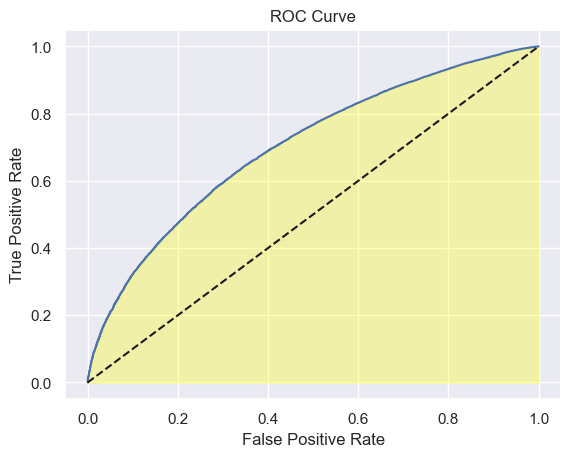

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(fpr, tpr) #ROC Curve
plt.plot(fpr, fpr, linestyle = '--', color ='k') #Benchmark
plt.fill_between(fpr, tpr, color='yellow', alpha=0.3) #Area under the curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [121]:
## Area under the curve:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
print(f"Area under the curve = {AUROC:.2%}")

Area under the curve = 70.22%


## Gini Coefficient and Kolmogrov-Smirnov coefficient

In [122]:
## Gini Graph
# Pre-requisites: Order estimated probabilities in ascending order:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.375280,0
42344,1,0.392099,0
39810,0,0.393735,0
40518,0,0.448967,0
42396,0,0.457733,0


In [123]:
# re-index dataframe so that it goes from the lowest y_hat_test_proba:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.375280,0
1,42344,1,0.392099,0
2,39810,0,0.393735,0
3,40518,0,0.448967,0
4,42396,0,0.457733,0


In [124]:
## cumsum: cumulative sum - sum rows until a given point ##

## Cumulaitve Number of all Observations: Python indexing starts from 0, so + 1:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1

## Cumulative Number of 'good', cumsum of the column with actual observations:
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()

## Cumulative Numeber of 'bad', the difference between the cumulative number of all observations and cumulative number of 'good' for each row:
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.375280,0,1,1,0
1,42344,1,0.392099,0,2,2,0
2,39810,0,0.393735,0,3,2,1
3,40518,0,0.448967,0,4,2,2
4,42396,0,0.457733,0,5,2,3


In [125]:
#Cumulative Proportions:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])

df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()

df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.375280,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.392099,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.393735,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.448967,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.457733,0,5,2,3,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'Gini')

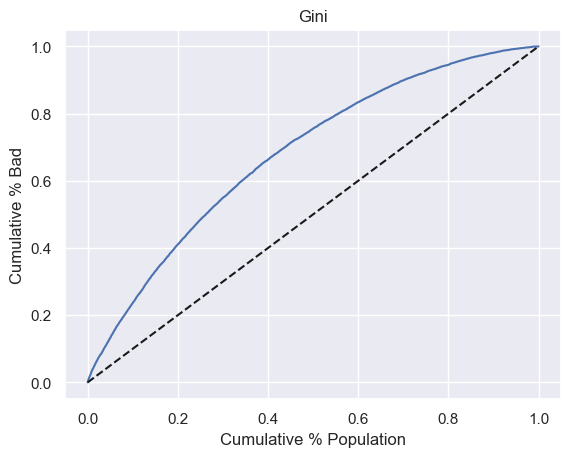

In [128]:
# Plot Gini: We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [130]:
#Analytical formula to calculate Gini: 
Gini = AUROC * 2 - 1
print(f"Gini = {Gini:.2%}")

Gini = 40.44%


Text(0.5, 1.0, 'Kolmogorov-Smirnov')

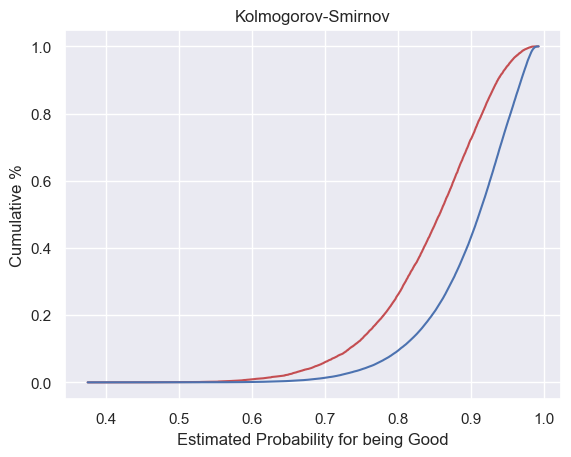

In [131]:
## K-S Graph: The further apart they are: the better the underlying feature differentiates them

#Predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis(red):
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')

#Predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis(blue):
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')

plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov Graph')

In [134]:
#maximum of the difference between the cumulative percentage of 'bad' and the cumulative percentage of 'good'.
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
print(f"KS = {KS:.3f}")

print("KS Above 0 is good = the closer to 1 better -> High Predictive Power 🪄 ")

KS = 0.297
KS Above 0 is good = the closer to 1 better -> High Predictive Power 🪄 


## Probability of Default of individual accounts:

In [136]:
pd.options.display.max_columns = None
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


## Creating a Scorecard

In [139]:
summary_table_p

,Feature Name,Coefficients,p_values
0,Intercept,-1.37405,NaN
1,grade:A,1.12366,0.00000
2,grade:B,0.87892,0.00000
3,grade:C,0.68480,0.00000
4,grade:D,0.49692,0.00000
5,grade:E,0.32149,0.00000
6,grade:F,0.13428,0.00624
7,home_ownership:OWN,0.09351,0.00000
8,home_ownership:MORTGAGE,0.10625,0.00000
9,addr_state:NM_VA,0.03602,0.26084


In [150]:
df_ref_categories = pd.DataFrame(ref_categories, columns= ['Feature Name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature Name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [151]:
df_scorecard = pd.concat([summary_table_p, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature Name,Coefficients,p_values
0,0,Intercept,-1.37405,NaN
1,1,grade:A,1.12366,0.00000
2,2,grade:B,0.87892,0.00000
3,3,grade:C,0.68480,0.00000
4,4,grade:D,0.49692,0.00000
5,5,grade:E,0.32149,0.00000
6,6,grade:F,0.13428,0.00624
7,7,home_ownership:OWN,0.09351,0.00000
8,8,home_ownership:MORTGAGE,0.10625,0.00000
9,9,addr_state:NM_VA,0.03602,0.26084


In [152]:
df_scorecard['Original feature name'] = df_scorecard['Feature Name'].str.split(':').str[0]

In [153]:
df_scorecard

,index,Feature Name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.37405,NaN,Intercept
1,1,grade:A,1.12366,0.00000,grade
2,2,grade:B,0.87892,0.00000,grade
3,3,grade:C,0.68480,0.00000,grade
4,4,grade:D,0.49692,0.00000,grade
5,5,grade:E,0.32149,0.00000,grade
6,6,grade:F,0.13428,0.00624,grade
7,7,home_ownership:OWN,0.09351,0.00000,home_ownership
8,8,home_ownership:MORTGAGE,0.10625,0.00000,home_ownership
9,9,addr_state:NM_VA,0.03602,0.26084,addr_state


Typical FICO Score: 
Min Score: 300
Max Score: 850

In [154]:
min_score = 300
max_score = 850

df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.37405
acc_now_delinq                 0.00000
addr_state                     0.00000
annual_inc                    -0.08152
dti                            0.00000
emp_length                     0.00000
grade                          0.00000
home_ownership                 0.00000
initial_list_status            0.00000
inq_last_6mths                 0.00000
int_rate                       0.00000
mths_since_earliest_cr_line    0.00000
mths_since_issue_d            -0.07179
mths_since_last_delinq         0.00000
mths_since_last_record         0.00000
purpose                        0.00000
term                           0.00000
verification_status           -0.01118
Name: Coefficients, dtype: float64

In [156]:
#Sum of minimum coefficients:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
print(f"Minimum sum of coefficients: {min_sum_coef}")

#Sum of maximum coefficients:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
print(f"Maximum sum of coefficients: {max_sum_coef}")

Minimum sum of coefficients: -1.53854
Maximum sum of coefficients: 5.59026


Formula:

$$
\text{score} = \text{variable\_coef} \times \left(\frac{{\text{max\_score} - \text{min\_score}}}{{\text{max\_sum\_coef} - \text{min\_sum\_coef}}}\right)
$$



In [157]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature Name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.37405,NaN,Intercept,-106.010479
1,1,grade:A,1.12366,0.00000,grade,86.692431
2,2,grade:B,0.87892,0.00000,grade,67.810291
3,3,grade:C,0.68480,0.00000,grade,52.833576
4,4,grade:D,0.49692,0.00000,grade,38.338290
5,5,grade:E,0.32149,0.00000,grade,24.803543
6,6,grade:F,0.13428,0.00624,grade,10.359948
7,7,home_ownership:OWN,0.09351,0.00000,home_ownership,7.214468
8,8,home_ownership:MORTGAGE,0.10625,0.00000,home_ownership,8.197382
9,9,addr_state:NM_VA,0.03602,0.26084,addr_state,2.779009


The formula for `intercept_score` is given by:

$$
\text{intercept\_score} = \left(\frac{{\text{intercept\_coef} - \text{min\_score}}}{{\text{max\_sum\_coef} - \text{min\_sum\_coef}}}\right) \times (\text{max\_score} - \text{min\_score}) + \text{min\_score}
$$

In [161]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard['Score - Calculation'] = df_scorecard['Score - Calculation'].round()
df_scorecard

/var/folders/k_/p3kns8712g36qk02pv5vmss40000gn/T/ipykernel_22534/554963789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature Name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.37405,NaN,Intercept,313.0
1,1,grade:A,1.12366,0.00000,grade,87.0
2,2,grade:B,0.87892,0.00000,grade,68.0
3,3,grade:C,0.68480,0.00000,grade,53.0
4,4,grade:D,0.49692,0.00000,grade,38.0
5,5,grade:E,0.32149,0.00000,grade,25.0
6,6,grade:F,0.13428,0.00624,grade,10.0
7,7,home_ownership:OWN,0.09351,0.00000,home_ownership,7.0
8,8,home_ownership:MORTGAGE,0.10625,0.00000,home_ownership,8.0
9,9,addr_state:NM_VA,0.03602,0.26084,addr_state,3.0


In [164]:
#Minimum score Preliminary:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Calculation'].min().sum()
print(f"Minimium Sum Score Preliminary: {min_sum_score_prel}")

#Maximum score Preliminary:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Calculation'].max().sum()
print(f"Maximium Sum Score Preliminary: {max_sum_score_prel}")

Minimium Sum Score Preliminary: 300.0
Maximium Sum Score Preliminary: 851.0


In [169]:
#Changing the maximum score back to 850, change the rounding of feature that rounded the most:
df_scorecard['Score - Final'] =  df_scorecard['Score - Calculation']
df_scorecard['Score - Final'][77] = 13
df_scorecard

/var/folders/k_/p3kns8712g36qk02pv5vmss40000gn/T/ipykernel_22534/2751253465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 13


,index,Feature Name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Final
0,0,Intercept,-1.37405,NaN,Intercept,313.0,313.0
1,1,grade:A,1.12366,0.00000,grade,87.0,87.0
2,2,grade:B,0.87892,0.00000,grade,68.0,68.0
3,3,grade:C,0.68480,0.00000,grade,53.0,53.0
4,4,grade:D,0.49692,0.00000,grade,38.0,38.0
5,5,grade:E,0.32149,0.00000,grade,25.0,25.0
6,6,grade:F,0.13428,0.00624,grade,10.0,10.0
7,7,home_ownership:OWN,0.09351,0.00000,home_ownership,7.0,7.0
8,8,home_ownership:MORTGAGE,0.10625,0.00000,home_ownership,8.0,8.0
9,9,addr_state:NM_VA,0.03602,0.26084,addr_state,3.0,3.0


In [170]:
#Minimum score Final:
min_sum_score_final = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
print(f"Minimium Sum Score Final: {min_sum_score_final}")

#Maximum score Final:
max_sum_score_final = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
print(f"Maximium Sum Score Final: {max_sum_score_final}")

Minimium Sum Score Final: 300.0
Maximium Sum Score Final: 850.0


## Calculating Credit Score

In [171]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [172]:
df_scorecard

,index,Feature Name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Final
0,0,Intercept,-1.37405,NaN,Intercept,313.0,313.0
1,1,grade:A,1.12366,0.00000,grade,87.0,87.0
2,2,grade:B,0.87892,0.00000,grade,68.0,68.0
3,3,grade:C,0.68480,0.00000,grade,53.0,53.0
4,4,grade:D,0.49692,0.00000,grade,38.0,38.0
5,5,grade:E,0.32149,0.00000,grade,25.0,25.0
6,6,grade:F,0.13428,0.00624,grade,10.0,10.0
7,7,home_ownership:OWN,0.09351,0.00000,home_ownership,7.0,7.0
8,8,home_ownership:MORTGAGE,0.10625,0.00000,home_ownership,8.0,8.0
9,9,addr_state:NM_VA,0.03602,0.26084,addr_state,3.0,3.0


In [173]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

#Adds new column to Dataframe: df.insert(index, column, values)
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [174]:
#Arranged in the same order:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature Name'].values]
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [175]:
#Store scores:
scorecard_scores = df_scorecard['Score - Final']

In [176]:
#Make sure have same shapes:
print(f"Shape of inputs_test_with_ref_cat_w_intercept: {inputs_test_with_ref_cat_w_intercept.shape}")
print(f"Shape of scorecard_scores: {scorecard_scores.shape}")

Shape of inputs_test_with_ref_cat_w_intercept: (93257, 102)
Shape of scorecard_scores: (102,)


In [177]:
scorecard_scores = scorecard_scores.values.reshape(102,1)
print(f"Shape of scorecard_scores: {scorecard_scores.shape}")

Shape of scorecard_scores: (102, 1)


In [179]:
#dot product:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores = y_scores.rename(columns={0: "Credit Scores"})
y_scores.head()

,Credit Scores
362514,614.0
288564,553.0
213591,576.0
263083,633.0
165001,682.0


## Reverse Engineer back: From Credit Score to Probability of Default

The formula for `sum_of_coef_from_score` is represented as:

$$
\text{sum\_of\_coef\_from\_score} = \left(\frac{{\text{total\_score} - \text{min\_score}}}{{\text{max\_score} - \text{min\_score}}}\right) \times (\text{max\_sum\_coef} - \text{min\_sum\_coef}) + \text{min\_sum\_coef}
$$

In [180]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,Credit Scores
362514,0.926311
288564,0.850777
213591,0.884813
263083,0.941455
165001,0.968100


In [181]:
y_hat_test_proba[0: 5]

array([0.92430568, 0.84923868, 0.88534964, 0.94063605, 0.96866493])

## Setting Cutoffs

In [183]:
tr = 0.9 #Cut-off Threshold
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [184]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7374,2816
1,35812,47255


In [185]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079072,0.030196
1,0.384014,0.506718


In [187]:
# Calculating crosstabs
cross_tab_0 = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])
cross_tab_1 = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames=['Actual'], colnames=['Predicted'])

# Calculating proportions
proportion_0 = cross_tab_0 / df_actual_predicted_probs.shape[0]
proportion_1 = cross_tab_1 / df_actual_predicted_probs.shape[0]

# Perform element-wise division
result = proportion_0.iloc[0, 0] + proportion_1.iloc[1, 1]
print(f"Accuracy Score at threshold of {tr} = {result:.2%}")

Accuracy Score at threshold of 0.9 = 58.58%


Text(0.5, 1.0, 'ROC curve')

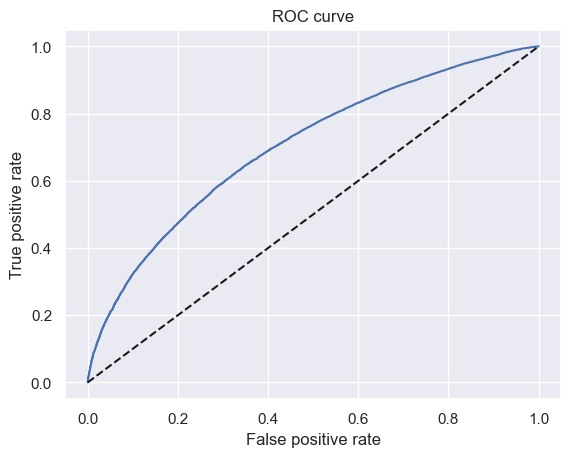

In [188]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [189]:
thresholds

array([1.99262873, 0.99262873, 0.99069787, ..., 0.4879097 , 0.3937345 ,
       0.37528002])

In [190]:
thresholds.shape

(17271,)

In [191]:
# We concatenate 3 dataframes along the columns.
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.992629,0.000000,0.000000
1,0.992629,0.000000,0.000012
2,0.990698,0.000000,0.000120
3,0.990653,0.000098,0.000120
4,0.989762,0.000098,0.000433


The score corresponding to each threshold ($T$) can be calculated as:

$$
\text{Score}(T) = \left(\ln\left(\frac{T}{1 - T}\right) - \text{Minimum Sum of Coefficients}\right) \times \left(\text{Minimum Score} + \frac{\text{Maximum Score} - \text{Minimum Score}}{\text{Maximum Sum of Coefficients} - \text{Minimum Sum of Coefficients}}\right)
$$


In [195]:
#Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1 but smaller than 1, say 1 - 1 / 10 ^ 16.
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

#Score corresponding to each threshold:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3253.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989762,0.000098,0.000433,771.0


In [197]:
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989762,0.000098,0.000433,771.0


In [198]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17266,0.493404,0.999411,0.999964,417.0
17267,0.488601,0.999607,0.999964,415.0
17268,0.487910,0.999607,0.999976,415.0
17269,0.393735,1.000000,0.999976,385.0
17270,0.375280,1.000000,1.000000,379.0


We define a function called `n_approved` that operates as follows:

- It assigns a value of 1 if a predicted probability is greater than the parameter `p`, which serves as a threshold, and a value of 0 if it is not.
- The function then sums the column.
- Therefore, when given any percentage values, the function will return the number of rows with estimated probabilities greater than the threshold.


In [199]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [200]:
#Number of approved applicants:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)

#Number of rejected applicants:
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']

#Approval Rate - ratio of the approved applications and all applications:
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

#Rejection Rate - one minus approval rate:
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [201]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992629,0.000000,0.000012,797.0,1,93256,0.000011,0.999989
2,0.990698,0.000000,0.000120,779.0,10,93247,0.000107,0.999893
3,0.990653,0.000098,0.000120,778.0,11,93246,0.000118,0.999882
4,0.989762,0.000098,0.000433,771.0,37,93220,0.000397,0.999603


In [204]:
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.
df_cutoffs.iloc[4000: 5000, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
4000,0.914248,0.205103,0.480913,601.0,42038,51219,0.450776,0.549224
4001,0.914244,0.205201,0.480913,601.0,42039,51218,0.450787,0.549213
4002,0.914214,0.205201,0.481190,601.0,42062,51195,0.451033,0.548967
4003,0.914214,0.205299,0.481190,601.0,42063,51194,0.451044,0.548956
4004,0.914214,0.205299,0.481202,601.0,42064,51193,0.451055,0.548945
4005,0.914211,0.205397,0.481202,601.0,42065,51192,0.451065,0.548935
4006,0.914134,0.205397,0.481720,601.0,42108,51149,0.451526,0.548474
4007,0.914130,0.205496,0.481720,601.0,42109,51148,0.451537,0.548463
4008,0.914108,0.205496,0.481864,601.0,42121,51136,0.451666,0.548334
4009,0.914106,0.205594,0.481864,601.0,42122,51135,0.451677,0.548323


In [205]:
inputs_train_with_ref_cat.to_csv('/Users/mckishiebombom/Desktop/credit-risk/inputs_train_with_ref_cat.csv')
df_scorecard.to_csv('/Users/mckishiebombom/Desktop/credit-risk/df_scorecard.csv')